In [1]:
%pip install nltk

In [2]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from nltk import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
import nltk
import numpy as np
import string
from wordcloud import WordCloud
nltk.download("wordnet")
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moyin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moyin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [5]:


class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word,pos = get_wordnet_pos(tag)) \
                 for word,tag in words_and_tags]

In [6]:
# Converting the csv file to a pandas dataframe
path = "C:/Users/moyin/OneDrive/Desktop/ASU/MFG 598/PROJECT/data/amazon_reviews.csv"
df = pd.read_csv(path)





In [7]:

#Sorting the data based on the Positive and Negative Reviews and spliting them to words
good_reviews = df[df['feedback'] == 1]
bad_reviews = df[df['feedback'] == 0]
good = good_reviews['verified_reviews'].tolist()
bad = bad_reviews['verified_reviews'].tolist()
good_str = ' '.join(good)
bad_str = ' '.join(bad)


In [ ]:
# Generate Word CLoud for Positive Reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(good_str))

In [ ]:
# Generate Word CLoud for Negative Reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bad_str))

In [ ]:
# Removing the extra spaces in the variation column
df['variation'] = df['variation'].str.strip()



In [ ]:
#Analyzing the number of each variation of the product
df['variation'].value_counts()

In [ ]:
import plotly.graph_objects as go
type_df = df[df['variation'] == "Oak Finish"]
feedback_counts = type_df.groupby('feedback').size()
feedback_counts[1]


In [ ]:
df['verified_reviews'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['verified_reviews'], inplace=True)


In [8]:
# Assigning the reviews (X) and the feedback as the target (Y)
X = df['verified_reviews']
y = df['feedback']

# Displaying the target column (Y) on a histogram according to the number of positive reviews and negative reviews
y.hist()

#### As seen in the histogram, the target column is imbalanced. Therefore, the column would be balanced using Oversampling. Oversampling is a technique which increases the number of samples of the smallest class up to the size of the biggest class

In [ ]:

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X.values.reshape(-1, 1), y)

In [10]:
# Perform cleaning of the data column as pass this function to the Vectorizer
def preprocessing(message):
    Test_punc_removed = [word for word in message if word not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords and word.lower().isalpha() and word is not None]
    Test_punc_removed_join_clean = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean

In [11]:
# reshape the array to a 1D.
X_res = np.ravel(X_res)
X_res.shape
#Convert the array to a dataframe.
X_res = pd.Series(X_res)

In [12]:
# Divide the balanced target column (Y) and  reviews column (X) to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res, 
                                                    test_size=0.25, random_state = 245)



<Axes: >

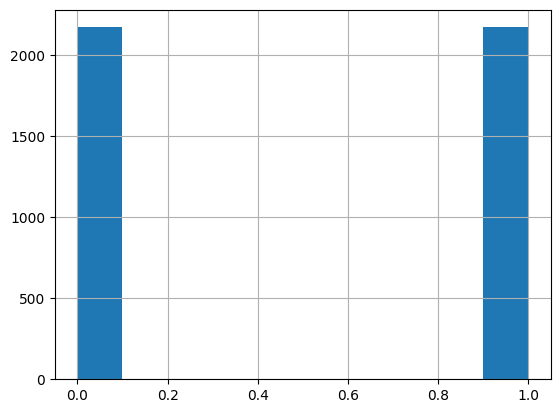

In [13]:
# Convert the y_train to a histogram.
y_train.hist()

In [14]:
# Viewing the shape of the X_train dataset.
X_train.shape

(4339,)

#### We would be using different models to predict the sentiment of the Reviews and test how well the model performed

In [ ]:
# Function to evaluate the model's performace
def model_evaluate(model):
    y_pred = model.predict(X_test)
    Pr_train = model.predict_proba(X_train)[:,1]
    Pr_test = model.predict_proba(X_test)[:,1]
    class_report = classification_report(y_test, y_pred,output_dict=True)

    return class_report

In [ ]:
# Using Tfidf Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=2000)
# tokenizer=LemmaTokenizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
# Using BernoulliNB 
BNBmodel = BernoulliNB(alpha = 1)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)


In [ ]:
# Using Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

In [ ]:
test = ["I am not fully into the product"]
# pred_test = tfidf.transform(test)
# BNBmodel.predict(pred_test)
# type(X_test)
test = pd.Series(test)
pred_test = tfidf.transform(test)
LRmodel.predict(pred_test)

In [ ]:
# vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),lowercase=False)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)


In [ ]:
# LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
# LRmodel.fit(X_train, y_train)
# model_evaluate(LRmodel)

In [ ]:
# from sklearn.naive_bayes import BernoulliNB
# BNBmodel = BernoulliNB(alpha = 2)
# BNBmodel.fit(X_train, y_train)
# model_evaluate(BNBmodel)

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# SVCmodel = LinearSVC()
# SVCmodel.fit(X_train, y_train)
# model_evaluate(SVCmodel)
# Y_pred = SVCmodel.predict(X_test)
# cm = confusion_matrix(y_test,Y_pred)
# sns.heatmap(cm,annot=True)

In [ ]:
# import matplotlib.pyplot as plt
# SVCmodel.coef_
# plt.hist(SVCmodel.coef_[0],bins=30)

In [ ]:
# word_index_map = vectorizer.vocabulary_
# threshold = 1 
# print("most negative words")
# for word,index in word_index_map.items():
#     weight = SVCmodel.coef_[0][index]
#     if weight < -threshold:
#         print(word,weight)

In [ ]:
# Using a Pipeline in Sklearn to chain the steps of the workflow 

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res, 
                                                    test_size=0.25, random_state = 245)

pipe = Pipeline([('vectorizer', tfidf),('LRmodel',LRmodel)])
pipe.fit(X_train, y_train)

model_evaluate(pipe)

In [ ]:
# Creating a pickle file to store and retrieve the object for future use
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipe, f)
    
with open('pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)
    
model_evaluate(loaded_pipe)

In [ ]:
test = ['I rate this product very very low',
        'I love this project']
# pred_test = tfidf.transform(test)
# BNBmodel.predict(pred_test)
# type(X_test)
test = pd.Series(test)
# pred_test = tfidf.transform(test)
loaded_pipe.predict(test)

#### The Count Vectorizer will be used and the performace of the model on the dataset will be compared to Tfidf Vectorizer

In [62]:
# Dividing the dataset to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res, 
                                                    test_size=0.25, random_state = 245)

In [63]:
def lemma_tokenizer(doc):
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [64]:
def user_preprocessing(message):
    Test_punc_removed = [word for word in message if word not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords and word.lower().isalpha() and word is not None]
    Test_punc_removed_join_clean = ' '.join(Test_punc_removed_join_clean)
    Test_punc_removed_join_clean= lemma_tokenizer(Test_punc_removed_join_clean)
    # Test_punc_removed_join_clean = list(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean

In [65]:
def preprocessing(message):
    Test_punc_removed = [word for word in message if word not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords and word.lower().isalpha() and word is not None]
    Test_punc_removed_join_clean = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean

#### The code sets up a CountVectorizer object with a custom tokenizer function, LemmaTokenizer(), and disables the lowercase option. It then uses the fitted CountVectorizer to transform the training data, X_train, into a document-term matrix and assigns the result to X_train. 

#### Finally, it transforms the test data, X_test, using the same vectorizer object and assigns the result to X_test.

In [66]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), lowercase=False)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

c:\Users\moyin\anaconda3\envs\sentiment\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
# Shape of the X test dataset
X_test.shape

(1447, 4034)

In [81]:
# Using BernoulliNB 
BNBmodel = BernoulliNB(alpha = 1)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)


{'0': {'precision': 0.8765652951699463,
  'recall': 0.677731673582296,
  'f1-score': 0.7644305772230889,
  'support': 723},
 '1': {'precision': 0.7376126126126126,
  'recall': 0.9046961325966851,
  'f1-score': 0.8126550868486353,
  'support': 724},
 'accuracy': 0.7912923289564616,
 'macro avg': {'precision': 0.8070889538912794,
  'recall': 0.7912139030894906,
  'f1-score': 0.7885428320358621,
  'support': 1447},
 'weighted avg': {'precision': 0.8070409398337268,
  'recall': 0.7912923289564616,
  'f1-score': 0.7885594956535628,
  'support': 1447}}

In [48]:
test = ['I strongly hate this product']
# pred_test = tfidf.transform(test)
# BNBmodel.predict(pred_test)
# type(X_test)
test = pd.Series(test)
pred_test = vectorizer.transform(test)
BNBmodel.predict(pred_test)

array([1], dtype=int64)

In [50]:
# Using LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 2000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       723
           1       1.00      0.94      0.97       724

    accuracy                           0.97      1447
   macro avg       0.97      0.97      0.97      1447
weighted avg       0.97      0.97      0.97      1447
 Train AUC 0.999106067269633 Test AUC 0.9915121157240778


In [51]:
# Using Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
model_evaluate(GBC)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       723
           1       0.89      0.91      0.90       724

    accuracy                           0.90      1447
   macro avg       0.90      0.90      0.90      1447
weighted avg       0.90      0.90      0.90      1447
 Train AUC 0.9715658217063652 Test AUC 0.9641361576610653


In [52]:
# Using MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
model_evaluate(NB_classifier)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       723
           1       0.95      0.90      0.93       724

    accuracy                           0.93      1447
   macro avg       0.93      0.93      0.93      1447
weighted avg       0.93      0.93      0.93      1447
 Train AUC 0.9913524888829399 Test AUC 0.9836011706899582


In [53]:
# Using a Pipeline in Sklearn to chain the steps of the workflow 

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res, 
                                                    test_size=0.25, random_state = 245)

pipe = Pipeline([('vectorizer', vectorizer),('MNB',NB_classifier)])
pipe.fit(X_train, y_train)

model_evaluate(pipe)

c:\Users\moyin\anaconda3\envs\sentiment\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       723
           1       0.95      0.90      0.93       724

    accuracy                           0.93      1447
   macro avg       0.93      0.93      0.93      1447
weighted avg       0.93      0.93      0.93      1447
 Train AUC 0.9913524888829399 Test AUC 0.9836011706899582


In [54]:
# Creating a pickle file to store and retrieve the object for future use
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipe, f)
    
with open('pipeline.pickle', 'rb') as f:
    loaded_vector_pipe = pickle.load(f)
    
model_evaluate(loaded_vector_pipe)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       723
           1       0.95      0.90      0.93       724

    accuracy                           0.93      1447
   macro avg       0.93      0.93      0.93      1447
weighted avg       0.93      0.93      0.93      1447
 Train AUC 0.9913524888829399 Test AUC 0.9836011706899582


In [55]:
# test = ['I rate this product badly',
#         'I love this project',
#         'I am going to return this product',
#         'I am very disappointed',
#         'I will definitely return']
# # pred_test = tfidf.transform(test)
# # BNBmodel.predict(pred_test)
# # type(X_test)
# test = pd.Series(test)
# # pred_test = tfidf.transform(test)
# loaded_vector_pipe.predict(test)

array([1, 1, 0, 0, 0], dtype=int64)

In [56]:
# A function that performs prediction according to the user input text
def predict(model, user_text):
    # Predict the sentiment
    
    # user_df = pd.DataFrame(user_text,columns=['user_text'])
    # cleaned_input = user_df['user_text'].apply(preprocessing)
    # input_feed = cleaned_input
    # vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),lowercase=False)
    # input_feed = vectorizer.transform(input_feed)
    # predictions = model.predict(input_feed)


    # preprocessed_text = user_preprocessing(user_text)
    predictions = model.predict(user_text)
    pred_to_label = {0: 'Negative', 1: 'Positive'}

    # Make a list of user_text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data


if __name__=="__main__":
    # Text to classify should be in a list.
    text = ['I rate this product badly',
        'I love this project',
        'I am going to return this product']
    
    predictions = predict(loaded_vector_pipe, text)
    print(predictions)

[('I rate this product badly', 1, 'Positive'), ('I love this project', 1, 'Positive'), ('I am going to return this product', 0, 'Negative')]
